In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [54]:
train = train.dropna(axis=1)
train = train.dropna(axis=0)

train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [55]:
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:
test = test.dropna(axis=1)
test = test.dropna(axis=0)

test.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal


In [96]:
train_features = ['Id','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd', '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'MoSold','YrSold']
X = train[train_features]
X_test = test[train_features]

In [97]:
y = train['SalePrice']

In [98]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [101]:
from sklearn.metrics import mean_absolute_error
def getMAE(max_leaf_nodes, train_X, pred_X, train_y, pred_y):
    mae_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    mae_model.fit(train_X, train_y)
    y_predicted = mae_model.predict(pred_X)
    mae = mean_absolute_error(y_predicted, pred_y)
    return mae

In [107]:
mae_metrics = []
for i in range(2, 1000):
    mae_metrics.append(getMAE(i, train_X, val_X, train_y, val_y))
    mae_ = {i : getMAE(i, train_X, val_X, train_y, val_y)}

import matplotlib.pyplot as plt

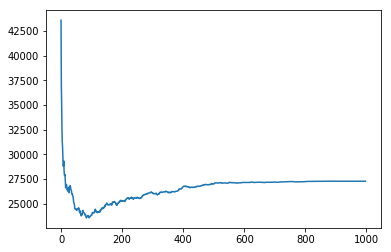

In [103]:
plt.plot(mae_metrics);

In [114]:
final_model = DecisionTreeRegressor(max_leaf_nodes= min(mae_, key = mae_.get), random_state= 0)
final_model.fit(X, y)
y_test = my_model.predict(val_X)

#### Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor
rand_model = RandomForestRegressor()
rand_model.fit(X, y)
y_pred = rand_model.predict(X_test)

In [120]:
y_pred

array([131340., 147900., 162014., ..., 149820., 131250., 232670.])

In [121]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)